# Modeling

To find the best model, firstly we will try to simplify our problem. In this notebook, different modeling techniques are compaired. We will use different encoder, scaler.  




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modeling

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.8 MB/s 


In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 2.7 MB/s 
     |████████████████████████████████| 192.9 MB 59 kB/s 
     |████████████████████████████████| 160 kB 25.2 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=86deda7609ffe6a9f020bbdbe05fe894402bc60c1d92fd957df3ff1d0d29f12d
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
import sklearn
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import gc; gc.enable()

from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#machine learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
#from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#define train and test 
train_set = pd.read_csv('/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/final_df_train.csv')
test_set =  pd.read_csv('/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/final_df_test.csv')

In [ ]:
df = train_set.copy()
df.head()

,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,...,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,69572,functional,roman,roman,-9.86,Lake Nyasa,11,1,gravity,gravity,...,34.94,0,VWC,1390,109,12,long rain,0,Iringa-5,non-autonomous
1,8776,functional,grumeti,grumeti,-2.15,Lake Victoria,20,1,gravity,gravity,...,34.70,1,Other,1399,280,3,long rain,1,Mara-2,other
2,34310,functional,other,world vision,-3.82,Pangani,21,1,gravity,gravity,...,37.46,1,VWC,686,250,4,short dry,0,Manyara-4,non-autonomous
3,67743,non functional,unicef,unicef,-11.16,Ruvuma / Southern Coast,90,1,submersible,submersible,...,38.49,1,VWC,263,58,27,short dry,1,Mtwara-63,non-autonomous
4,19728,functional,other,artisan,-1.83,Lake Victoria,18,1,gravity,gravity,...,31.13,1,Other,1329,529,16,long dry,1,Kagera-1,other


In [ ]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [ ]:
df.shape

(59399, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59399 entries, 0 to 59398
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  int64  
 2   funder                 59399 non-null  object 
 3   installer              59399 non-null  object 
 4   latitude               59399 non-null  float64
 5   basin                  59399 non-null  object 
 6   region_code            59399 non-null  int64  
 7   public_meeting         59399 non-null  int64  
 8   extraction_type        59399 non-null  object 
 9   extraction_type_class  59399 non-null  object 
 10  payment_type           59399 non-null  object 
 11  water_quality          59399 non-null  object 
 12  quantity               59399 non-null  object 
 13  source                 59399 non-null  object 
 14  waterpoint_type        59399 non-null  object 
 15  lo

In [ ]:
# we dropped some columns for now, because we have categorized versions of them
df.drop(columns=['id',],inplace=True )

In [ ]:
df1 = df.copy() # to protect original df , take the copy of it

Now, we need to use scaler for numeric columns and encoder for categorical columns. So, we divided columns in two.

In [ ]:
X = df1.drop(['status_group'], axis=1,)
X.head()

,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,payment_type,water_quality,...,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,roman,roman,-9.86,Lake Nyasa,11,1,gravity,gravity,annually,soft,...,34.94,0,VWC,1390,109,12,long rain,0,Iringa-5,non-autonomous
1,grumeti,grumeti,-2.15,Lake Victoria,20,1,gravity,gravity,never pay,soft,...,34.70,1,Other,1399,280,3,long rain,1,Mara-2,other
2,other,world vision,-3.82,Pangani,21,1,gravity,gravity,per bucket,soft,...,37.46,1,VWC,686,250,4,short dry,0,Manyara-4,non-autonomous
3,unicef,unicef,-11.16,Ruvuma / Southern Coast,90,1,submersible,submersible,never pay,soft,...,38.49,1,VWC,263,58,27,short dry,1,Mtwara-63,non-autonomous
4,other,artisan,-1.83,Lake Victoria,18,1,gravity,gravity,never pay,soft,...,31.13,1,Other,1329,529,16,long dry,1,Kagera-1,other


Now, we need to use scaler for numeric columns and encoder for categorical columns. So, we divided columns in two.

In [ ]:
cat_col = [cname for cname in X .columns if
                   X [cname].dtype == "object"]

cat_col

['funder',
 'installer',
 'basin',
 'extraction_type',
 'extraction_type_class',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'scheme_management',
 'season',
 'region_district',
 'authority_scheme']

In [ ]:
print(cat_col)

['funder', 'installer', 'basin', 'extraction_type', 'extraction_type_class', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'scheme_management', 'season', 'region_district', 'authority_scheme']


In [ ]:
num_col = ['gps_height','longitude','latitude','population','public_meeting','age','permit','amount_tsh_missing','region_code',]

In [ ]:
#2:'latitude',1:'longitude',5:'age',0:'gps_height',3'population',8:'region_code',7'amount_tsh_missing',6:'permit',4:'public_meeting'


In [ ]:
df1['status_group'].value_counts()

0    32259
2    22823
1     4317
Name: status_group, dtype: int64

0 = functional water points ,

1 = functional but needs repair water points,

2 = non-functinal water points

We collect functional and functional but needs help target together and make them 1, non-functional is 0.

In [ ]:
target='status_group' #assign out target column as target

## Making Pipeline / Baseline

In [ ]:
# Dividing X and target 

used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [ ]:
used_cols

['funder',
 'installer',
 'latitude',
 'basin',
 'region_code',
 'public_meeting',
 'extraction_type',
 'extraction_type_class',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'longitude',
 'permit',
 'scheme_management',
 'gps_height',
 'population',
 'age',
 'season',
 'amount_tsh_missing',
 'region_district',
 'authority_scheme']

##split

In [ ]:
X = df1.drop(['status_group'], axis=1)
y = df1['status_group']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)

#Custom  function

In [ ]:
def confusion_matrix_plotter (y_test,y_pred):
  fig, ax = plt.subplots(figsize=(8,5)) 
  data = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
  ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
  ax.set_xlabel("Predicted")
  ax.set_ylabel ("Actual")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_yticklabels(ax.get_xticklabels(), rotation=0)

In [ ]:

# referd from https://github.com/scikit-learn/scikit-learn/issues/12720

# this function can lable encode multiple columns at once where sklearns label encoder only encode one column at a time and we can not use it in pipeline 

from sklearn.base import BaseEstimator, TransformerMixin

class My_LabelEncoder(BaseEstimator, TransformerMixin):
    def fit( self , df ,df_y  ):
      maps_={}
      for col in df:
        y = df[col]
        uni = np.unique(y)
        map_ = {}
        for c in uni:
            map_[c] = len(map_)
        maps_[col] = map_
      self.maps_ = maps_
      return self


    def transform(self , df):
      ndf = df.copy()
      for col in df:
        ny = []
        map_= self.maps_[col]
        for c in np.array(df[col]):
          if c in self.maps_[col]:
            ny.append(self.maps_[col][c])
          else:
            ny.append(-1)
        ndf[col] = ny
      return ndf

##Balanced Accuracy formula
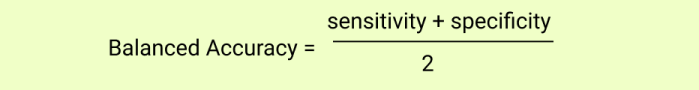


###Balanced accuracy formula

###Sensitivity: This is also known as true positive rate or recall, it measures the proportion of real positives that are correctly predicted out of total positive prediction made by the model.

##Sensitivity= TP / (TP + FN)

###Specificity: Also known as true negative rate, it measures the proportion of correctly identified negatives over the total negative prediction made by the model.

##Specificity =TN / (TN + FP)

#Model Overview

##Baseline model

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

X_encoded = pd.DataFrame(preprocessor.fit_transform(X,y))

In [ ]:
X_encoded

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.517483,0.496276,0.153648,0.003541,1.0,0.316667,0.0,0.0,0.102041,108.0,...,0.0,0.0,6.0,1.0,8.0,1.0,7.0,1.0,20.0,1.0
1,0.520629,0.473929,0.815451,0.009148,1.0,0.166667,1.0,1.0,0.193878,44.0,...,0.0,2.0,6.0,2.0,5.0,1.0,2.0,1.0,55.0,2.0
2,0.271329,0.730912,0.672103,0.008164,1.0,0.183333,1.0,0.0,0.204082,96.0,...,0.0,5.0,6.0,1.0,0.0,2.0,7.0,2.0,52.0,1.0
3,0.123427,0.826816,0.042060,0.001869,1.0,0.566667,1.0,1.0,0.908163,136.0,...,5.0,2.0,6.0,0.0,3.0,2.0,7.0,2.0,76.0,1.0
4,0.496154,0.141527,0.842918,0.017312,1.0,0.383333,1.0,1.0,0.173469,96.0,...,0.0,2.0,6.0,3.0,5.0,1.0,2.0,0.0,22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,0.454545,0.703911,0.721030,0.004066,1.0,0.350000,1.0,0.0,0.020408,41.0,...,0.0,5.0,6.0,1.0,8.0,1.0,10.0,1.0,38.0,0.0
59395,0.455245,0.525140,0.221459,0.001803,1.0,0.366667,1.0,0.0,0.102041,96.0,...,0.0,0.0,6.0,1.0,6.0,1.0,7.0,1.0,19.0,1.0
59396,0.391259,0.410615,0.248927,0.007115,1.0,0.366667,0.0,1.0,0.112245,96.0,...,1.0,1.0,1.0,1.0,3.0,4.0,7.0,1.0,65.0,1.0
59397,0.391259,0.581937,0.452361,0.007115,1.0,0.316667,1.0,1.0,0.000000,96.0,...,1.0,2.0,6.0,2.0,7.0,4.0,7.0,1.0,12.0,1.0


In [ ]:
#define the models
models=[LogisticRegression(max_iter = 1000000,  random_state=42),
        KNeighborsClassifier(),
        DecisionTreeClassifier( random_state=42),
       RandomForestClassifier( random_state=42),
       XGBClassifier( random_state=42),
        BaggingClassifier( random_state=42), 
        AdaBoostClassifier( random_state=42),
        GradientBoostingClassifier( random_state=42),]

#create a list of model names
names =['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier',  'XGB Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier']

#create empty lists for the accuracy and standard deviation
accuracy=[]
std = []

#peform 10-fold cross validaton on each model and append the results to the list
for model in models:
  cv = KFold(n_splits=10, shuffle = True,  random_state=1)
  n_scores = cross_val_score(model, X_encoded, y, scoring='f1_micro', cv=cv, n_jobs=-1, error_score='raise')
  mean_score = np.mean(n_scores)
  std_score = np.std(n_scores)
  accuracy.append(mean_score)
  std.append(std_score)

#create a dataframe of the model performances
d = {'Model':names,'Accuracy':accuracy, 'Std':std}   
score_df = pd.DataFrame(d)
score_df

,Model,Accuracy,Std
0,Logistic Regression,0.667638,0.006343
1,KNN Classifier,0.762740,0.005688
2,Decision Tree Classifier,0.756545,0.003878
3,Random Forest Classifier,0.803886,0.003408
4,XGB Classifier,0.800468,0.004247
5,Bagging Classifier,0.793195,0.003054
6,AdaBoost Classifier,0.720500,0.006245
7,Gradient Boosting Classifier,0.750989,0.005729


#No scaling / Label Encoder

In [ ]:
from sklearn.preprocessing import StandardScaler

rf = RandomForestClassifier(criterion='gini', max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=400)

encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder

cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_micro')
print(scores.mean(), "+/-", scores.std()) 

0.7865283542272345 +/- 0.0028702810649549157


#Baseline - Robust Scaler/ Target Encoder with Random Forest

To scale numeric values and encode categorical columns, we will make pipeline and also use it in our model and classifier changes. For the first trial we use Robust Scaler as a scaler. Robust scales variables using statistics that are strong to outliers. Robust Scaler use IQR(Interquartile Range). value = (value – median) / (p75 – p25). As a encoder, we will try target encoder which works well with higher cardinality features. Our data has higher unique values also. 
Our first trial for baseline is Random Forest as it performed well compaired to other classes. we are taking hyperparameter tuned random forest here that

We will create empty dataframe to write our results on it to keep when parameters changed.

In [ ]:
df_results1 = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'micro avg f1 score mean', 'micro avg f1 score std']) # to see all results

In [ ]:
#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
rf = RandomForestClassifier(criterion='gini', max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=400)

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)


In [ ]:
scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_micro')
print("mean micro avg f1 score",scores.mean(), "+/-", scores.std()) 

mean micro avg f1 score 0.8022693642375434 +/- 0.0014103387075663082


In [ ]:
df_results1 = df_results1.append({       # first trial is written in results 
     "Model": 'Random Forest' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'TargetEncoder',
               'micro avg f1 score mean' : 0.80226,
                    'micro avg f1 score std' : 0.00141}, ignore_index=True)


# Robust Scaler/ LeaveOneOut Encoder with Random Forest

LeaveOneOut Encoder excludes the row’s target when calculating the mean target for a level to reduce the effect of outliers. It is good for outliers but we have already cleaned most of our outliers. To make sure, we tried this encoder also. 

In [ ]:
scaler = RobustScaler()
encoder = ce.LeaveOneOutEncoder(cols=cat_col)

num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)


preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_micro')
print(scores.mean(), "+/-", scores.std())



0.07796430364197011 +/- 0.0013191386117099308


In [ ]:
df_results1 = df_results1.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'LeaveOneOut',
                'micro avg f1 score mean' : 0.077964,
                    'micro avg f1 score std' : 0.00131}, ignore_index=True)


LeaveOneOut did not improve target encoding results

# Robust Scaler/ OneHot Encoder with Random Forest

In [ ]:
scaler = RobustScaler()
encoder = ce.OneHotEncoder(cols=cat_col)

num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)


preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_micro')
print(scores.mean(), "+/-", scores.std())



0.8007710264811031 +/- 0.0014041634695054477


In [ ]:
df_results1 = df_results1.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'OneHot',
                'micro avg f1 score mean' : 0.800771,
                    'micro avg f1 score std' : 0.001404}, ignore_index=True)


one hot encoder dose not work well with high cardinal data that we have 

#Robust Scaler / Label encoder Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_micro')
print(scores.mean(), "+/-", scores.std()) 

0.8033973628021949 +/- 0.0032429565769547947


In [ ]:
df_results1 = df_results1.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'Label encoder',
                'micro avg f1 score mean' : 0.803397,
                    'micro avg f1 score std' : 0.003242}, ignore_index=True)


#Standerd Scaler / Label encoder Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_micro')
print(scores.mean(), "+/-", scores.std()) 



0.8029764902157359 +/- 0.0028387446130916484


In [ ]:
df_results1 = df_results1.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'Label encoder',
                'micro avg f1 score mean' : 0.8029764,
                    'micro avg f1 score std' : 0.002838}, ignore_index=True)


The result does not change significantly so, we decided our encoder as WoE and scaler as Robust.

# Standerd Scaler/ OrdinalEncoder Encoder with RF


Ordinal encoder is same as label encoder but only differenc is  order is preserved

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoder = ce.OrdinalEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_micro')
print(scores.mean(), "+/-", scores.std()) 

0.8029596169342781 +/- 0.0017097537622986062


In [ ]:
df_results1 = df_results1.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'OrdinalEncoder',
                'micro avg f1 score mean' : 0.802959,
                    'micro avg f1 score std' : 0.0017097}, ignore_index=True)


# Robust Scaler/ OrdinalEncoder Encoder with RF

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
encoder = ce.OrdinalEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_micro')
print(scores.mean(), "+/-", scores.std()) 

0.8026229095115365 +/- 0.0015091898975715466


In [ ]:
df_results1 = df_results1.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'OrdinalEncoder',
                'micro avg f1 score mean' : 0.80262,
                    'micro avg f1 score std' : 0.001509}, ignore_index=True)


#Robust Scaler/ Hashing Encoder with Random Forest

A vector of categorical variables gets converted to a higher dimensional space of integers, where the distance between two vectors of categorical variables in approximately maintained the transformed numerical dimensional space. With Feature Hashing, the number of dimensions will be far less than the number of dimensions with simple binary encoding

In [ ]:
from sklearn.preprocessing import StandardScaler
#StandardScaler
scaler = RobustScaler()
encoder = ce.HashingEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_micro')
print(scores.mean(), "+/-", scores.std()) 

0.7880267628440876 +/- 0.001680274591874099


In [ ]:
df_results1 = df_results1.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'HashingEncoder',
                'micro avg f1 score mean' : 0.7880267,
                    'micro avg f1 score std' : 0.0016802}, ignore_index=True)


# MinMax Scaler/ LabelEncoder with random forest


When the distribution is not Gaussian or the standard deviation is very small, the min-max scaler generally works well. So, we will see and compare our scalers.

In [ ]:
scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_micro')
print(scores.mean(), "+/-", scores.std()) 

0.8037003888536003 +/- 0.00367389050071091


In [ ]:
df_results1 = df_results1.append({       # results written in dataframe
     "Model": 'Random Forest' ,
      "Scaler": 'MinMax' , 
       'Encoder' : 'Label encoder',
                'micro avg f1 score mean' : 0.80370038,
                    'micro avg f1 score std' : 0.003673}, ignore_index=True)


# Comparing Different Encoder and Scalers

In [ ]:
df_results1 

,Model,Scaler,Encoder,micro avg f1 score mean,micro avg f1 score std
0,Random Forest,Robust,TargetEncoder,0.802260,0.001410
1,Random Forest,Robust,LeaveOneOut,0.077964,0.001310
2,Random Forest,Robust,OneHot,0.800771,0.001404
3,Random Forest,Robust,Label encoder,0.803397,0.003242
4,Random Forest,StandardScaler,Label encoder,0.802976,0.002838
5,Random Forest,StandardScaler,OrdinalEncoder,0.802959,0.001710
6,Random Forest,RobustScaler,OrdinalEncoder,0.802620,0.001509
7,Random Forest,RobustScaler,HashingEncoder,0.788027,0.001680
8,Random Forest,MinMax,Label encoder,0.803700,0.003673


In [ ]:
df_results1.sort_values('micro avg f1 score mean',ascending=False) 

,Model,Scaler,Encoder,micro avg f1 score mean,micro avg f1 score std
8,Random Forest,MinMax,Label encoder,0.803700,0.003673
3,Random Forest,Robust,Label encoder,0.803397,0.003242
4,Random Forest,StandardScaler,Label encoder,0.802976,0.002838
5,Random Forest,StandardScaler,OrdinalEncoder,0.802959,0.001710
6,Random Forest,RobustScaler,OrdinalEncoder,0.802620,0.001509
0,Random Forest,Robust,TargetEncoder,0.802260,0.001410
2,Random Forest,Robust,OneHot,0.800771,0.001404
7,Random Forest,RobustScaler,HashingEncoder,0.788027,0.001680
1,Random Forest,Robust,LeaveOneOut,0.077964,0.001310


#Observaltion
##1. from the results we can  see MinMax Scaler with Label Encoder gave us best results

##2. For further modling  i will use Top 3 encoders and scalers i.e minmax, robust, standerd Scalers and Label Encoder, Target Encoder


In [ ]:
c = list(X.columns)
c.insert(0,'id')
ids = test_set['id'].copy()
f_test = test_set[c]
f_test.head()

,id,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,payment_type,...,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,50785,other,dmdd,-4.06,Internal,21,1,other,other,never pay,...,35.29,1,Parastatal,1996,321,1,short dry,1,Manyara-3,non-autonomous
1,51630,other,dwe,-3.31,Pangani,2,1,gravity,gravity,never pay,...,36.66,1,VWC,1569,300,13,short dry,1,Arusha-2,non-autonomous
2,17168,other,other,-5.00,Internal,13,1,other,other,never pay,...,34.77,1,VWC,1567,500,3,short dry,1,Singida-2,non-autonomous
3,45559,other,other,-9.42,Ruvuma / Southern Coast,80,1,other,other,unknown,...,38.06,1,VWC,267,250,26,short dry,1,Lindi-43,non-autonomous
4,49871,other,other,-10.95,Ruvuma / Southern Coast,10,1,gravity,gravity,monthly,...,35.01,1,Water Board,1260,60,13,long rain,0,Ruvuma-3,autonomous


#KNN

In [ ]:
df_results_all1 = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'f1_micro train', 'f1_micro test']) # to see all results

##KNN/ RobustScaler/TargetEncoder

In [ ]:
#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
knn = KNeighborsClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,knn)

neighbors = list(range(1,50))
parameters = {
    'kneighborsclassifier__n_neighbors': neighbors 
}

grid_search = GridSearchCV(pipe, parameters, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['gps_height',
                                                                          'longitude',
                                                                          'latitude',
                                                                          'population',
                                                                          'public_meeting',
                                                                          'age',
                                                                          'permit',
                  

In [ ]:
#print best parameters 
print('Best Score:', grid_search.best_score_)
print('Parameters:', grid_search.best_params_)
print('Best Model:', grid_search.best_estimator_)

Best Score: 0.7759424384871659
Parameters: {'kneighborsclassifier__n_neighbors': 6}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('targetencoder',
                                                                  

Accuracy score train: 0.8263221027378522
Balance Accuracy score train: 0.6876325772905801
Accuracy score test: 0.7808080808080808
Balance Accuracy score test: 0.6243180338950363
----------
micro avg score train: 0.8263221027378522
micro avg score test: 0.7808080808080808
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      6452
           1       0.55      0.26      0.35       863
           2       0.83      0.71      0.77      4565

    accuracy                           0.78     11880
   macro avg       0.71      0.62      0.65     11880
weighted avg       0.78      0.78      0.77     11880



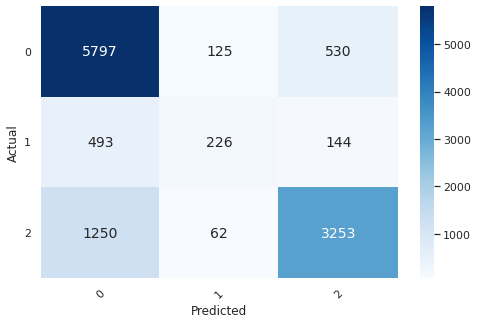

In [ ]:

#score model
knn = KNeighborsClassifier(n_neighbors=6)


scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,knn)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results 
     "Model": 'KNN' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'TargetEncoder',
               'f1_micro train' : 0.826322,
                    'f1_micro test' : 0.780808}, ignore_index=True)

##KNN - RobustScaler/ Label Encoder

In [ ]:
#making pipeline
scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
knn = KNeighborsClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,knn)

neighbors = list(range(1,50))
parameters = {
    'kneighborsclassifier__n_neighbors': neighbors 
}

grid_search = GridSearchCV(pipe, parameters, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
grid_search.fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search.best_score_)
print('Parameters:', grid_search.best_params_)
print('Best Model:', grid_search.best_estimator_)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
Best Score: 0.7557608951012971
Parameters: {'kneighborsclassifier__n_neighbors': 3}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('my_labelencoder',
 

Accuracy score train: 0.8596771817588754
Accuracy score test: 0.7627104377104377
--------------------
Balance Accuracy score train: 0.7546962652779436
Balance Accuracy score test: 0.6246146796243117
----------
micro avg score train: 0.8596771817588754
micro avg score test: 0.7627104377104377
              precision    recall  f1-score   support

           0       0.77      0.84      0.81      6452
           1       0.48      0.29      0.37       863
           2       0.78      0.74      0.76      4565

    accuracy                           0.76     11880
   macro avg       0.68      0.62      0.64     11880
weighted avg       0.75      0.76      0.76     11880



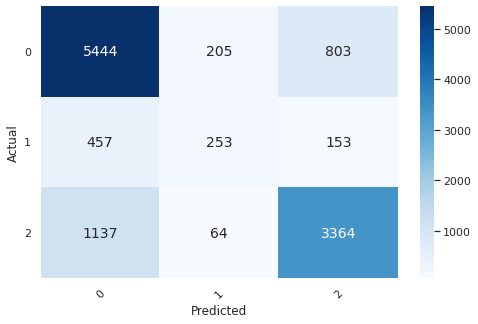

In [ ]:

#score model
knn = KNeighborsClassifier(n_neighbors=3)


scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,knn)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


this did not improve previous target encoding gave better results i think thats beacuse in target encoding range of categorical varibles is smaller than that of label encoder

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results 
     "Model": 'KNN' ,
      "Scaler": 'Robust' , 
       'Encoder' : 'Label Encoder',
               'f1_micro train' : 0.859677,
                    'f1_micro test' : 0.76271}, ignore_index=True)

##KNN - MinMaxScaler/ Label Encoder

In [ ]:
#making pipeline
scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
knn = KNeighborsClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,knn)

neighbors = list(range(1,30))
parameters = {
    'kneighborsclassifier__n_neighbors': neighbors 
}

grid_search = GridSearchCV(pipe, parameters, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
grid_search.fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search.best_score_)
print('Parameters:', grid_search.best_params_)
print('Best Model:', grid_search.best_estimator_)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
Best Score: 0.7577390981661136
Parameters: {'kneighborsclassifier__n_neighbors': 3}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('my_labelencoder',
 

Accuracy score train: 0.8596771817588754
Accuracy score test: 0.7627104377104377
--------------------
Balance Accuracy score train: 0.7546962652779436
Balance Accuracy score test: 0.6246146796243117

----------
micro avg score train: 0.8596771817588754
micro avg score test: 0.7627104377104377
              precision    recall  f1-score   support

           0       0.77      0.84      0.81      6452
           1       0.48      0.29      0.37       863
           2       0.78      0.74      0.76      4565

    accuracy                           0.76     11880
   macro avg       0.68      0.62      0.64     11880
weighted avg       0.75      0.76      0.76     11880



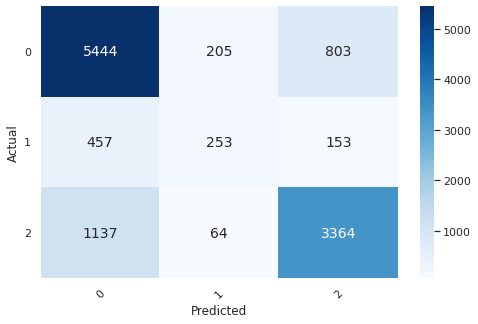

In [ ]:

#score model
knn = KNeighborsClassifier(n_neighbors=3)


scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,knn)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


did not improve previous same results as previous  

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results 
     "Model": 'KNN' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'Label Encoder',
               'f1_micro train' : 0.8596771,
                    'f1_micro test' : 0.762710}, ignore_index=True)

##KNN - StandardScaler/ Label Encoder

In [ ]:
#making pipeline
scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
knn = KNeighborsClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,knn)

neighbors = list(range(1,30))
parameters = {
    'kneighborsclassifier__n_neighbors': neighbors 
}

grid_search = GridSearchCV(pipe, parameters, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
grid_search.fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search.best_score_)
print('Parameters:', grid_search.best_params_)
print('Best Model:', grid_search.best_estimator_)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
Best Score: 0.7555715897486052
Parameters: {'kneighborsclassifier__n_neighbors': 3}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                                  Pipeline(steps=[('my_labelencoder

Accuracy score train: 0.8593194301226877
Balance Accuracy score train: 0.754026462878591
Accuracy score test: 0.7624579124579125
Balance Accuracy score test: 0.6246163220258215

----------
micro avg score train: 0.8593194301226877
micro avg score test: 0.7624579124579124
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      6452
           1       0.48      0.30      0.37       863
           2       0.78      0.73      0.76      4565

    accuracy                           0.76     11880
   macro avg       0.68      0.62      0.64     11880
weighted avg       0.75      0.76      0.76     11880



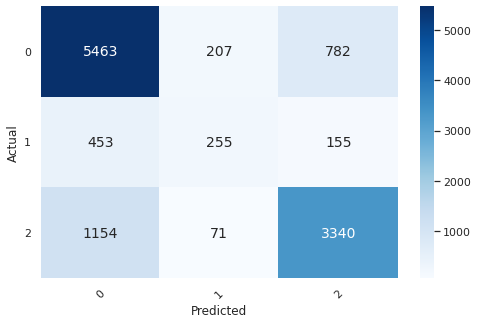

In [ ]:
from sklearn.preprocessing import StandardScaler
#score model
knn = KNeighborsClassifier(n_neighbors=3)


scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,knn)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


same results as previous one 

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results 
     "Model": 'KNN' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'Label Encoder',
               'f1_micro train' : 0.859319,
                    'f1_micro test' : 0.7624579}, ignore_index=True)

#Decision Tree

## RobustScaler/Target encoding

In [ ]:
#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
dt = DecisionTreeClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,dt)

params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
    'decisiontreeclassifier__criterion': ["gini", "entropy"]
}

random_search_dt = RandomizedSearchCV(pipe, param_distributions = params, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_dt.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_dt.best_score_)
print('Parameters:', random_search_dt.best_params_)
print('Best Model:', random_search_dt.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.7598435062758364
Parameters: {'decisiontreeclassifier__min_samples_leaf': 50, 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__criterion': 'gini'}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 (

Accuracy score train: 0.7795408152528462
Accuracy score test: 0.7606902356902356
--------------------
Balance Accuracy score train: 0.6155408490373813
Balance Accuracy score test: 0.5907705344656096
----------
micro avg score train: 0.7795408152528462
micro avg score test: 0.7606902356902356
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      6452
           1       0.57      0.19      0.29       863
           2       0.78      0.70      0.74      4565

    accuracy                           0.76     11880
   macro avg       0.70      0.59      0.61     11880
weighted avg       0.75      0.76      0.75     11880



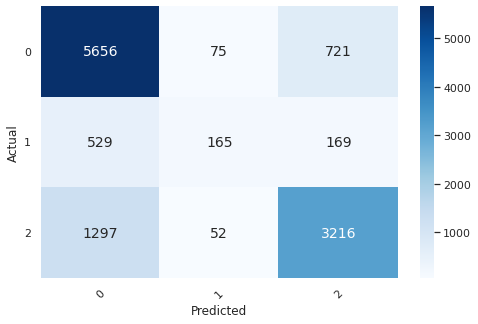

In [ ]:

#score model
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=50, criterion = 'gini',random_state=42)

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,dt)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


Decison tree reduced over fitting as compaired to knn

knn worked well on rare class as compaired to decision tree but decision tree worked well on mejority class as compaired to knn


In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results RobustScaler/Label encoding
     "Model": 'Decision Tree' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'Target encoding',
               'f1_micro train' : 0.77954,
                    'f1_micro test' : 0.760690}, ignore_index=True)

## RobustScaler/Label encoding

In [ ]:
#making pipeline

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
dt = DecisionTreeClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,dt)

params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
    'decisiontreeclassifier__criterion': ["gini", "entropy"]
}

random_search_dt = RandomizedSearchCV(pipe, param_distributions = params, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_dt.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_dt.best_score_)
print('Parameters:', random_search_dt.best_params_)
print('Best Model:', random_search_dt.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.770176276906439
Parameters: {'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__criterion': 'gini'}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('c

Accuracy score train: 0.8510911424903723
Accuracy score test: 0.7735690235690236
--------------------
Balance Accuracy score train: 0.7349615919126212
Balance Accuracy score test: 0.6298697620150705

----------
micro avg score train: 0.8510911424903723
micro avg score test: 0.7735690235690237
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      6452
           1       0.45      0.29      0.35       863
           2       0.81      0.73      0.77      4565

    accuracy                           0.77     11880
   macro avg       0.68      0.63      0.65     11880
weighted avg       0.77      0.77      0.77     11880



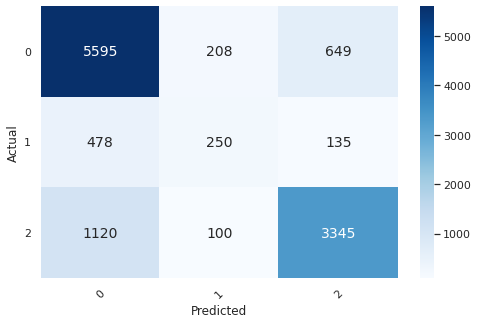

In [ ]:

#score model
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, criterion = 'gini',random_state=42)

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,dt)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


when lable encoding is use we see improved performance on rare class and but mejority class  suffers 



In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results 
     "Model": 'Decision Tree' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'Label encoding',
               'f1_micro train' : 0.851091,
                    'f1_micro test' : 0.773569}, ignore_index=True)

## MinMaxScaler/Label encoding decision tree

In [ ]:
#making pipeline
scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
dt = DecisionTreeClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,dt)

params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
    'decisiontreeclassifier__criterion': ["gini", "entropy"]
}

random_search_dt = RandomizedSearchCV(pipe, param_distributions = params, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_dt.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_dt.best_score_)
print('Parameters:', random_search_dt.best_params_)
print('Best Model:', random_search_dt.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.7560345571409031
Parameters: {'decisiontreeclassifier__min_samples_leaf': 50, 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__criterion': 'entropy'}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                               

Accuracy score train: 0.7744902039184326
Accuracy score test: 0.7613636363636364
--------------------
Balance Accuracy score train: 0.5969876743513283
Balance Accuracy score test: 0.5813384665398434

----------
micro avg score train: 0.7744902039184325
micro avg score test: 0.7613636363636364
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      6452
           1       0.59      0.16      0.25       863
           2       0.79      0.71      0.74      4565

    accuracy                           0.76     11880
   macro avg       0.71      0.58      0.60     11880
weighted avg       0.75      0.76      0.74     11880



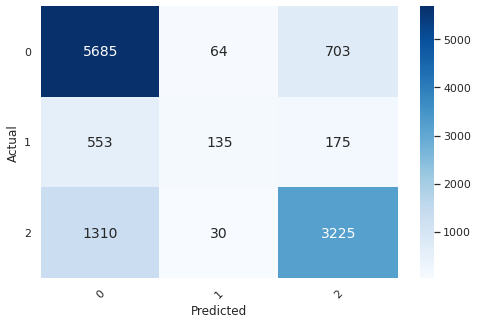

In [ ]:

#score model
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=50, criterion = 'entropy',random_state=42)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,dt)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


min max scaler reduced overfitting of robust scaler 

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results 
     "Model": 'Decision Tree' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'Label encoding',
               'f1_micro train' : 0.774490,
                    'f1_micro test' : 0.761363}, ignore_index=True)

##StanderScaler/ label encoder 

In [ ]:
#making pipeline
scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
dt = DecisionTreeClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,dt)

params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
    'decisiontreeclassifier__criterion': ["gini", "entropy"]
}

random_search_dt = RandomizedSearchCV(pipe, param_distributions = params, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_dt.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_dt.best_score_)
print('Parameters:', random_search_dt.best_params_)
print('Best Model:', random_search_dt.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.7713967314696109
Parameters: {'decisiontreeclassifier__min_samples_leaf': 10, 'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__criterion': 'entropy'}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                           

Accuracy score train: 0.8229339843010164
Accuracy score test: 0.7765151515151515
--------------------
Balance Accuracy score train: 0.6811789485089507
Balance Accuracy score test: 0.6197468141783549

----------
micro avg score train: 0.8229339843010164
micro avg score test: 0.7765151515151515
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      6452
           1       0.51      0.25      0.34       863
           2       0.81      0.73      0.77      4565

    accuracy                           0.78     11880
   macro avg       0.70      0.62      0.64     11880
weighted avg       0.77      0.78      0.77     11880



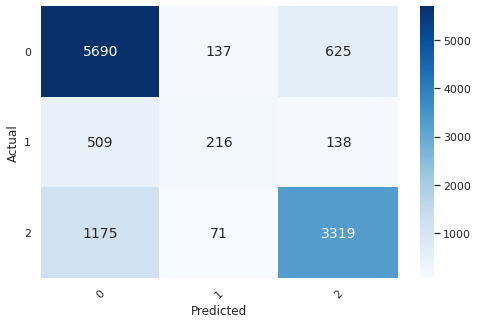

In [ ]:

#score model
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, criterion = 'entropy',random_state=42)

scaler = StandardScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,dt)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*10)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


standerdscaler dit not improve results of  minmax scaler not huge  difference 

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results 
     "Model": 'Decision Tree' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'Label encoding',
               'f1_micro train' : 0.82293,
                    'f1_micro test' : 0.776515}, ignore_index=True)

# Xgboost

##RobustScaler / TargetEncoder Xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
xgb = XGBClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,xgb)

param_grid = { 'xgbclassifier__n_estimators': [50,65,80,100, 200, 300, 400, 500, 600, 700,],
              'xgbclassifier__colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'xgbclassifier__eta': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
             'xgbclassifier__max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16],
              'xgbclassifier__learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'xgbclassifier__reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'xgbclassifier__reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'xgbclassifier__min_child_weight': [0.1,0.5,1, 2, 3, 4,5,10,20],
              'xgbclassifier__gamma' : [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200]}

kfolds = StratifiedKFold(10)

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1,
                                       cv =  kfolds.split(X_train,y_train),  verbose = 2,  scoring = 'f1_micro')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.8019741059298522
Parameters: {'xgbclassifier__reg_lambda': 102.4, 'xgbclassifier__reg_alpha': 6.4, 'xgbclassifier__n_estimators': 400, 'xgbclassifier__min_child_weight': 0.5, 'xgbclassifier__max_depth': 16, 'xgbclassifier__learning_rate': 0.4, 'xgbclassifier__gamma': 0.4, 'xgbclassifier__eta': 0.2, 'xgbclassifier__colsample_bytree': 0.4}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
               

Accuracy score train: 0.8493444727372209
Accuracy score test: 0.8056397306397306
--------------------
Balance Accuracy score train: 0.7026254481225492
Balance Accuracy score test: 0.6387897616962132

micro avg score train: 0.8493444727372209
micro avg score test: 0.8056397306397306
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.64      0.24      0.35       863
           2       0.84      0.77      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.81      0.79     11880



'\nAccuracy score train: 0.8053620657000358\nAccuracy score test: 0.7874579124579124\n--------------------\nBalance Accuracy score train: 0.641124016701026\nBalance Accuracy score test: 0.6112429704199704\n\nmicro avg score train: 0.8053620657000358\nmicro avg score test: 0.7874579124579123'

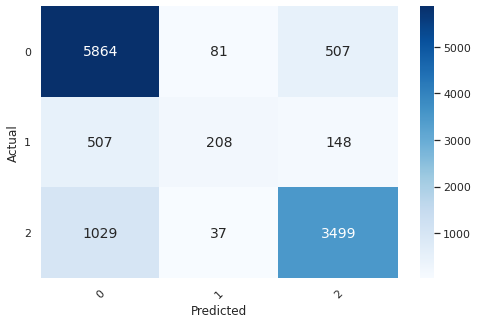

In [ ]:

#score model

xgb = XGBClassifier(colsample_bytree=0.4, eta=0.2, gamma = 0.4, learning_rate = 0.4, min_child_weight = 0.5, reg_lambda = 102.4,
                    max_depth=16, n_estimators= 400, reg_alpha = 6.4, objective='multi:softprob',random_state=42)

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)




as compaired to decison tree and knn xgb gave better results

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results 
     "Model": 'XGB' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'TargetEncoder',
               'f1_micro train' : 0.84934,
                    'f1_micro test' : 0.80563}, ignore_index=True)

##RobustScaler / LabelEncoder Xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#making pipeline
scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
xgb = XGBClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,xgb)

param_grid = { 'xgbclassifier__n_estimators': [50,65,80,100, 200, 300, 400, 500, 600, 700,],
              'xgbclassifier__colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'xgbclassifier__eta': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
             'xgbclassifier__max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16],
              'xgbclassifier__learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'xgbclassifier__reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'xgbclassifier__reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'xgbclassifier__min_child_weight': [0.1,0.5,1, 2, 3, 4,5,10,20],
              'xgbclassifier__gamma' : [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200]}

kfolds = StratifiedKFold(10)

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1,
                                       cv =  kfolds.split(X_train,y_train),  verbose = 2,  scoring = 'f1_micro')
random_search_xgb.fit(X_train, y_train)


#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.7769103190751265
Parameters: {'xgbclassifier__reg_lambda': 6.4, 'xgbclassifier__reg_alpha': 25.6, 'xgbclassifier__n_estimators': 65, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 14, 'xgbclassifier__learning_rate': 0.25, 'xgbclassifier__gamma': 0.8, 'xgbclassifier__eta': 0.1, 'xgbclassifier__colsample_bytree': 0.3}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                  

Accuracy score train: 0.7907363370441297
Accuracy score test: 0.7817340067340067
--------------------
Balance Accuracy score train: 0.6081509826303216
Balance Accuracy score test: 0.5933925422323331

micro avg score train: 0.7907363370441297
micro avg score test: 0.7817340067340067
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      6452
           1       0.70      0.15      0.25       863
           2       0.83      0.71      0.77      4565

    accuracy                           0.78     11880
   macro avg       0.76      0.59      0.62     11880
weighted avg       0.78      0.78      0.76     11880



'\nAccuracy score train: 0.843788800269366\nAccuracy score test: 0.8005892255892256\n--------------------\nBalance Accuracy score train: 0.7070411870373468\nBalance Accuracy score test: 0.6425454424129725\n\nmicro avg score train: 0.843788800269366\nmicro avg score test: 0.8005892255892256\n\n'

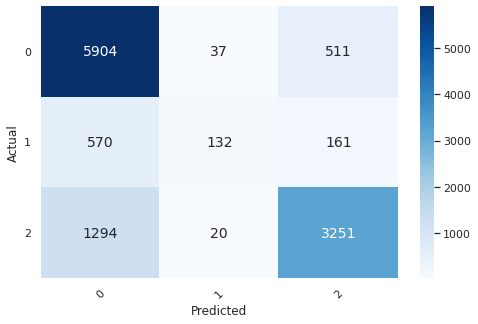

In [ ]:

#score model

xgb = XGBClassifier(colsample_bytree=0.3, eta=0.1, gamma = 0.8, learning_rate = 0.25, min_child_weight = 4, reg_lambda = 6.4,
                    max_depth=14, n_estimators= 65, reg_alpha = 25.6, objective='multi:softprob',random_state=42)

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)



as compaired to when we use robust scaler and target encoding, robust scaling with label we get less overfitting than previous model but f1_score is not improved

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results 
     "Model": 'XGB' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'LabelEncoder',
               'f1_micro train' : 0.790736,
                    'f1_micro test' : 0.781734}, ignore_index=True)

##MinMax Scaler/ Label Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
#making pipeline
scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# choosing model
xgb = XGBClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,xgb)

param_grid = { 'xgbclassifier__n_estimators': [50,65,80,100, 200, 300, 400, 500, 600, 700,],
              'xgbclassifier__colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'xgbclassifier__eta': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
             'xgbclassifier__max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16],
              'xgbclassifier__learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'xgbclassifier__reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'xgbclassifier__reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'xgbclassifier__min_child_weight': [0.1,0.5,1, 2, 3, 4,5,10,20],
              'xgbclassifier__gamma' : [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200]}

kfolds = StratifiedKFold(10)

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1,
                                       cv =  kfolds.split(X_train,y_train),  verbose = 2,  scoring = 'f1_micro')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.7983754483372985
Parameters: {'xgbclassifier__reg_lambda': 0.4, 'xgbclassifier__reg_alpha': 0, 'xgbclassifier__n_estimators': 80, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 0.8, 'xgbclassifier__eta': 0.9, 'xgbclassifier__colsample_bytree': 0.4}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                       

In [ ]:
#Parameters: {'xgbclassifier__reg_lambda': 0.4, 'xgbclassifier__reg_alpha': 0, 'xgbclassifier__n_estimators': 80,
# 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.2,
# 'xgbclassifier__gamma': 0.8, 'xgbclassifier__eta': 0.9, 'xgbclassifier__colsample_bytree': 0.4}


In [ ]:
#score model

xgb = XGBClassifier(colsample_bytree=0.4, eta=0.9, gamma = 0.8, learning_rate = 0.2, min_child_weight = 4, reg_lambda = 0.4,
                    max_depth=8, n_estimators= 80, reg_alpha = 0, objective='multi:softprob',random_state=42)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy score train: 0.838611923651592
Accuracy score test: 0.8031144781144781
--------------------
Balance Accuracy score train: 0.6861679769894117
Balance Accuracy score test: 0.63524666026398

micro avg score train: 0.838611923651592
micro avg score test: 0.8031144781144781
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      6452
           1       0.68      0.24      0.36       863
           2       0.86      0.74      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.77      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results
     "Model": 'XGB' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'LabelEncoder',
               'f1_micro train' : 0.83861,
                    'f1_micro test' : 0.80311}, ignore_index=True)

minmax scaler with label encoder improved previous models results and also reduced overfitting 

##StandardScaler / LabelEncoder Xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#making pipeline
scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
xgb = XGBClassifier()
#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,xgb)

param_grid = { 'xgbclassifier__n_estimators': [50,65,80,100, 200, 300, 400, 500, 600, 700,],
              'xgbclassifier__colsample_bytree' :[ 0.1, 0.2, 0.3, 0.4, 0.5],
              'xgbclassifier__eta': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
             'xgbclassifier__max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16],
              'xgbclassifier__learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'xgbclassifier__reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'xgbclassifier__reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'xgbclassifier__min_child_weight': [0.1,0.5,1, 2, 3, 4,5,10,20],
              'xgbclassifier__gamma' : [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200]}

kfolds = StratifiedKFold(10)

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1,
                                       cv =  kfolds.split(X_train,y_train),  verbose = 2,  scoring = 'f1_micro')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.8057199680450049
Parameters: {'xgbclassifier__reg_lambda': 6.4, 'xgbclassifier__reg_alpha': 0.8, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__min_child_weight': 2, 'xgbclassifier__max_depth': 16, 'xgbclassifier__learning_rate': 0.7, 'xgbclassifier__gamma': 0.1, 'xgbclassifier__eta': 0.2, 'xgbclassifier__colsample_bytree': 0.2}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                

Accuracy score train: 0.8973884130558303
Accuracy score test: 0.8087542087542088
--------------------
Balance Accuracy score train: 0.7915423653402321
Balance Accuracy score test: 0.6542698111135136

micro avg score train: 0.8973884130558303
micro avg score test: 0.8087542087542088
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6452
           1       0.60      0.29      0.39       863
           2       0.85      0.78      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.75      0.65      0.68     11880
weighted avg       0.80      0.81      0.80     11880



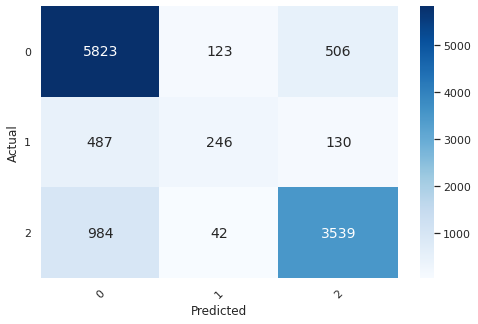

In [ ]:

#score model

xgb = XGBClassifier(colsample_bytree=0.2, eta=0.2, gamma = 0.1, learning_rate = 0.7, min_child_weight = 2, reg_lambda = 6.4,
                    max_depth=16, n_estimators= 50, reg_alpha = 0.8, objective='multi:softprob',random_state=42)

scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


Standerd scaler did not improve previous models results

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'XGB' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'LabelEncoder',
               'f1_micro train' : 0.89738,
                    'f1_micro test' : 0.80875}, ignore_index=True)

#for XGB minmax scaler with label encoder worked well

#light gbm

##Robust Scaler / Target Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

#Create a based model
lgbm  = LGBMClassifier( random_state=42, )

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,lgbm)

param_grid = {
    'lgbmclassifier__n_estimators': [100,200,300,400, 700, 1000],
    'lgbmclassifier__colsample_bytree': [0.7, 0.8],
    'lgbmclassifier__max_depth': [1,2,4,8,12,15,20,25],
    'lgbmclassifier__num_leaves': [50, 100, 200],
    'lgbmclassifier__reg_alpha': [1.1, 1.2, 1.3],
    'lgbmclassifier__reg_lambda': [1.1, 1.2, 1.3],
    'lgbmclassifier__min_split_gain': [0.3, 0.4],
    'lgbmclassifier__subsample': [0.7, 0.8, 0.9],
    'lgbmclassifier__subsample_freq': [20]
}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.8028368518199608
Parameters: {'lgbmclassifier__subsample_freq': 20, 'lgbmclassifier__subsample': 0.7, 'lgbmclassifier__reg_lambda': 1.1, 'lgbmclassifier__reg_alpha': 1.3, 'lgbmclassifier__num_leaves': 200, 'lgbmclassifier__n_estimators': 700, 'lgbmclassifier__min_split_gain': 0.3, 'lgbmclassifier__max_depth': 25, 'lgbmclassifier__colsample_bytree': 0.8}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',

Accuracy score train: 0.8531113870241377
Accuracy score test: 0.8068181818181818
--------------------
Balance Accuracy score train: 0.7188468728952381
Balance Accuracy score test: 0.6475716128426181
--------------------
micro avg score train: 0.8531113870241377
micro avg score test: 0.8068181818181818
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.63      0.27      0.38       863
           2       0.85      0.76      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.80      0.81      0.80     11880



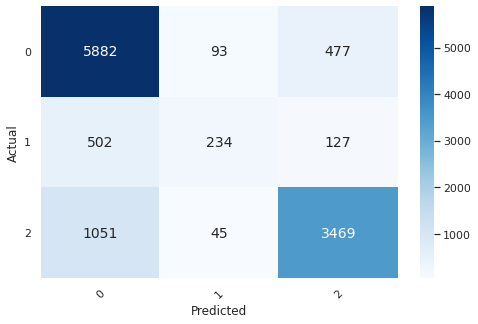

In [ ]:

#score model
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=700,
                                num_leaves=200, random_state=42, reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.7,
                                subsample_freq=20)

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


light gbm worked very well on class 0 as compaired to xgb also overfitting is reduced significantly

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'LBGM' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'TargetEncoder',
               'f1_micro train' : 0.853111,
                    'f1_micro test' : 0.8068181}, ignore_index=True)

##Robust Scaler / Label Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
#making pipeline
scaler = RobustScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

#Create a based model
lgbm  = LGBMClassifier( random_state=42, )

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,lgbm)

param_grid = {
    'lgbmclassifier__n_estimators': [100,200,300,400, 700, 1000],
    'lgbmclassifier__colsample_bytree': [0.7, 0.8],
    'lgbmclassifier__max_depth': [1,2,4,8,12,15,20,25],
    'lgbmclassifier__num_leaves': [50, 100, 200],
    'lgbmclassifier__reg_alpha': [1.1, 1.2, 1.3],
    'lgbmclassifier__reg_lambda': [1.1, 1.2, 1.3],
    'lgbmclassifier__min_split_gain': [0.3, 0.4],
    'lgbmclassifier__subsample': [0.7, 0.8, 0.9],
    'lgbmclassifier__subsample_freq': [20]
}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.8026474224458859
Parameters: {'lgbmclassifier__subsample_freq': 20, 'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__reg_lambda': 1.1, 'lgbmclassifier__reg_alpha': 1.2, 'lgbmclassifier__num_leaves': 200, 'lgbmclassifier__n_estimators': 700, 'lgbmclassifier__min_split_gain': 0.3, 'lgbmclassifier__max_depth': 25, 'lgbmclassifier__colsample_bytree': 0.7}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',

Accuracy score train: 0.8519329110461079
Accuracy score test: 0.807996632996633
--------------------
Balance Accuracy score train: 0.7141465267682937
Balance Accuracy score test: 0.645070071392785
--------------------
micro avg score train: 0.8519329110461079
micro avg score test: 0.8079966329966329
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      6452
           1       0.67      0.26      0.38       863
           2       0.85      0.76      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.77      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



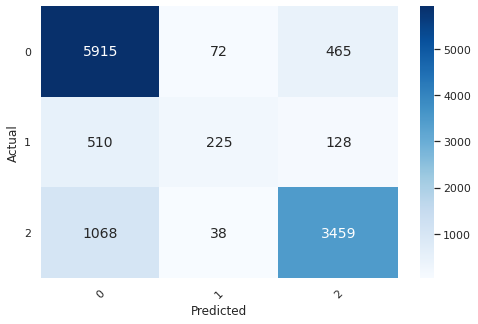

In [ ]:

#score model
lgbm = LGBMClassifier(colsample_bytree=0.7, max_depth=25,
                                min_split_gain=0.3, n_estimators=700,
                                num_leaves=200, random_state=42, reg_alpha=1.2,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20)

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score

print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


label encoder  further reduced overfitting

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'LGBM' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'LabelEncoder',
               'f1_micro train' : 0.8519329,
                    'f1_micro test' :  0.8079966}, ignore_index=True)

##MinMax Scaler / Label Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
#making pipeline
scaler = MinMaxScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

#Create a based model
lgbm  = LGBMClassifier( random_state=42, )

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,lgbm)

param_grid = {
    'lgbmclassifier__n_estimators': [100,200,300,400, 700, 1000],
    'lgbmclassifier__colsample_bytree': [0.7, 0.8],
    'lgbmclassifier__max_depth': [1,2,4,8,12,15,20,25],
    'lgbmclassifier__num_leaves': [50, 100, 200],
    'lgbmclassifier__reg_alpha': [1.1, 1.2, 1.3],
    'lgbmclassifier__reg_lambda': [1.1, 1.2, 1.3],
    'lgbmclassifier__min_split_gain': [0.3, 0.4],
    'lgbmclassifier__subsample': [0.7, 0.8, 0.9],
    'lgbmclassifier__subsample_freq': [20]
}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.801342704211837
Parameters: {'lgbmclassifier__subsample_freq': 20, 'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__reg_lambda': 1.1, 'lgbmclassifier__reg_alpha': 1.3, 'lgbmclassifier__num_leaves': 100, 'lgbmclassifier__n_estimators': 400, 'lgbmclassifier__min_split_gain': 0.3, 'lgbmclassifier__max_depth': 25, 'lgbmclassifier__colsample_bytree': 0.8}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',


Accuracy score train: 0.8366548117595067
Accuracy score test: 0.8018518518518518
--------------------
Balance Accuracy score train: 0.6903504169508726
Balance Accuracy score test: 0.6390419885303689

--------------------
micro avg score train: 0.8366548117595067
micro avg score test: 0.8018518518518518
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      6452
           1       0.65      0.26      0.37       863
           2       0.85      0.75      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



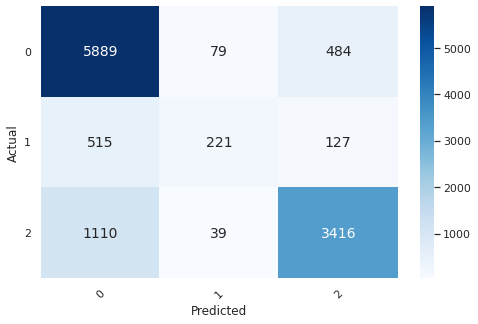

In [ ]:

#score model
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=400,
                                num_leaves=100, random_state=42, reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


min maxscaler reduced overfitting more than robustscaler

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'LGBM' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'LabelEncoder',
               'f1_micro train' : 0.8366548,
                    'f1_micro test' : 0.801851}, ignore_index=True)

##Standard Scaler / Label Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
#making pipeline
scaler = StandardScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

#Create a based model
lgbm  = LGBMClassifier( random_state=42, )

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,lgbm)

param_grid = {
    'lgbmclassifier__n_estimators': [100,200,300,400, 700, 1000],
    'lgbmclassifier__colsample_bytree': [0.7, 0.8],
    'lgbmclassifier__max_depth': [1,2,4,8,12,15,20,25],
    'lgbmclassifier__num_leaves': [50, 100, 200],
    'lgbmclassifier__reg_alpha': [1.1, 1.2, 1.3],
    'lgbmclassifier__reg_lambda': [1.1, 1.2, 1.3],
    'lgbmclassifier__min_split_gain': [0.3, 0.4],
    'lgbmclassifier__subsample': [0.7, 0.8, 0.9],
    'lgbmclassifier__subsample_freq': [20]
}

random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.8021003109747585
Parameters: {'lgbmclassifier__subsample_freq': 20, 'lgbmclassifier__subsample': 0.9, 'lgbmclassifier__reg_lambda': 1.1, 'lgbmclassifier__reg_alpha': 1.3, 'lgbmclassifier__num_leaves': 200, 'lgbmclassifier__n_estimators': 400, 'lgbmclassifier__min_split_gain': 0.4, 'lgbmclassifier__max_depth': 25, 'lgbmclassifier__colsample_bytree': 0.7}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'perm

Accuracy score train: 0.8408426103242913
Accuracy score test: 0.80496632996633
--------------------
Balance Accuracy score train: 0.6920623515140832
Balance Accuracy score test: 0.6402487636187626
--------------------
micro avg score train: 0.8408426103242913
micro avg score test: 0.80496632996633
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      6452
           1       0.67      0.25      0.37       863
           2       0.85      0.75      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.77      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



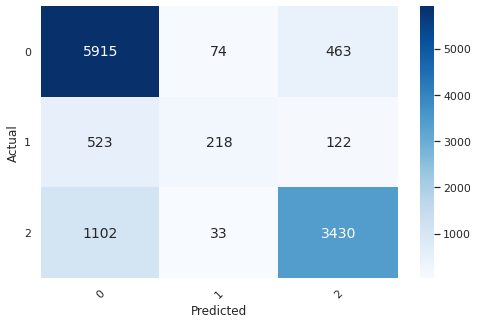

In [ ]:

#score model
lgbm = LGBMClassifier(colsample_bytree=0.7, max_depth=25,
                                min_split_gain=0.4, n_estimators=400,
                                num_leaves=200, random_state=42, reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.9,
                                subsample_freq=20)

scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


Standerd Scaler worked well on class 0 improved results

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'LGBM' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'LabelEncoder',
               'f1_micro train' : 0.8408426,
                    'f1_micro test' : 0.8049663}, ignore_index=True)

# for lgbm minmax scaler with label encoder gave best results

#Random Forest

##Robust Scaler/ Target Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier())])

param_grid = {'classiffier__max_depth': [1, 3, 5, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200, 300, 400,600,800,1000, None],
              'classiffier__max_features': ['sqrt','log2', None],
              "classiffier__criterion": ["gini", "entropy"],
              'classiffier__min_samples_leaf': [0.1,0.5,1, 2, 4,6,8,10,20,30,50,70,80,100,200,400,500],
              'classiffier__min_samples_split': [0.1,0.5,1, 2, 4,6,8,10,20,30,50,70,80,100,200,400,500],
              'classiffier__n_estimators': [1,2,4,6,8,10,20 ,30,40, 50, 100, 200, 400, 600, 800, 1000]}

random_search_rf = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_rf.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_rf.best_score_)
print('Parameters:', random_search_rf.best_params_)
print('Best Model:', random_search_rf.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.7920200877433566
Parameters: {'classiffier__n_estimators': 600, 'classiffier__min_samples_split': 6, 'classiffier__min_samples_leaf': 10, 'classiffier__max_features': 'log2', 'classiffier__max_depth': 20, 'classiffier__criterion': 'gini'}
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                

Accuracy score train: 0.821671331467413
Accuracy score test: 0.79503367003367
--------------------
Balance Accuracy score train: 0.6478242752251107
Balance Accuracy score test: 0.6126322550664556
--------------------
micro avg score train: 0.821671331467413
micro avg score test: 0.79503367003367
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      6452
           1       0.72      0.19      0.29       863
           2       0.85      0.73      0.79      4565

    accuracy                           0.80     11880
   macro avg       0.78      0.61      0.64     11880
weighted avg       0.80      0.80      0.78     11880



'\nAccuracy score train: 0.9106883562364528\nAccuracy score test: 0.8145622895622896\n--------------------\nBalance Accuracy score train: 0.8002089111961651\nBalance Accuracy score test: 0.6583044244583997\n--------------------\nmicro avg score train: 0.9106883562364528\nmicro avg score test: 0.8145622895622896\n'

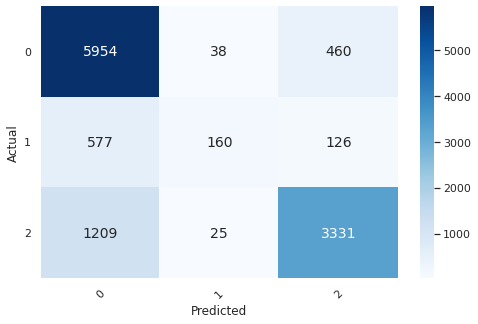

In [ ]:

#score model
rf = RandomForestClassifier(max_depth=20, max_features='log2',
                                        min_samples_leaf=10,
                                        min_samples_split=6,
                                        n_estimators=600,random_state = 42)

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


no improvement in results

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'Random Forest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'TargetEncoder',
               'f1_micro train' : 0.821671,
                    'f1_micro test' : 0.795033}, ignore_index=True)

##Robust Scaler/ Label Encoder

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

scaler = RobustScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier())])

param_grid = {'classiffier__max_depth': [1, 3, 5, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200, 300, 400,600,800,1000, None],
              'classiffier__max_features': ['sqrt','log2', None],
              "classiffier__criterion": ["gini", "entropy"],
              'classiffier__min_samples_leaf': [0.1,0.5,1, 2, 4,6,8,10,20,30,50,70,80,100,200,400,500],
              'classiffier__min_samples_split': [0.1,0.5,1, 2, 4,6,8,10,20,30,50,70,80,100,200,400,500],
              'classiffier__n_estimators': [1,2,4,6,8,10,20 ,30,40, 50, 100, 200, 400, 600, 800, 1000]}

random_search_rf = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_rf.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_rf.best_score_)
print('Parameters:', random_search_rf.best_params_)
print('Best Model:', random_search_rf.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.7868010021990763
Parameters: {'classiffier__n_estimators': 1000, 'classiffier__min_samples_split': 70, 'classiffier__min_samples_leaf': 4, 'classiffier__max_features': 'log2', 'classiffier__max_depth': 200, 'classiffier__criterion': 'gini'}
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                              

Accuracy score train: 0.8107072960289569
Accuracy score test: 0.7885521885521886
--------------------
Balance Accuracy score train: 0.6297851105640885
Balance Accuracy score test: 0.5994424229485515

--------------------
micro avg score train: 0.8107072960289569
micro avg score test: 0.7885521885521887
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      6452
           1       0.72      0.16      0.26       863
           2       0.85      0.71      0.78      4565

    accuracy                           0.79     11880
   macro avg       0.78      0.60      0.62     11880
weighted avg       0.79      0.79      0.77     11880



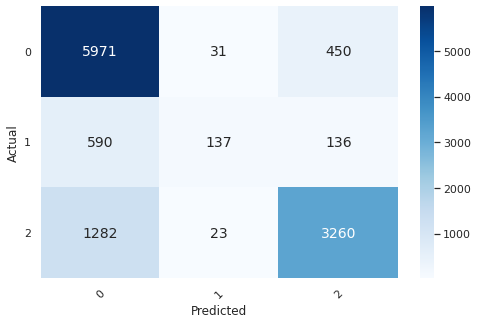

In [ ]:

#score model
rf =  RandomForestClassifier(max_depth=200, max_features='log2',
                                        min_samples_leaf=4,
                                        min_samples_split=70,
                                        n_estimators=1000)
scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'Random Forest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'Label Encoder',
               'f1_micro train' : 0.810707,
                    'f1_micro test' : 0.788552}, ignore_index=True)

## MinMax Scaler / label Encoding

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

scaler = MinMaxScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier())])
param_grid = {'classiffier__max_depth': [1, 3, 5, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200, 300, 400,600,800,1000, None],
              'classiffier__max_features': ['sqrt','log2', None],
              "classiffier__criterion": ["gini", "entropy"],
              'classiffier__min_samples_leaf': [0.1,0.5,1, 2, 4,6,8,10,20,30,50,70,80,100,200,400,500],
              'classiffier__min_samples_split': [0.1,0.5,1, 2, 4,6,8,10,20,30,50,70,80,100,200,400,500],
              'classiffier__n_estimators': [1,2,4,6,8,10,20 ,30,40, 50, 100, 200, 400, 600, 800, 1000]}

random_search_rf = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_rf.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_rf.best_score_)
print('Parameters:', random_search_rf.best_params_)
print('Best Model:', random_search_rf.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.8038468509553545
Parameters: {'classiffier__n_estimators': 400, 'classiffier__min_samples_split': 20, 'classiffier__min_samples_leaf': 2, 'classiffier__max_features': 'log2', 'classiffier__max_depth': 40, 'classiffier__criterion': 'gini'}
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                

Accuracy score train: 0.8591510764115406
Accuracy score test: 0.8047138047138047
--------------------
Balance Accuracy score train: 0.7012251671358664
Balance Accuracy score test: 0.6322986237261802

--------------------
micro avg score train: 0.8591510764115406
micro avg score test: 0.8047138047138047
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      6452
           1       0.69      0.22      0.34       863
           2       0.85      0.75      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.78      0.63      0.66     11880
weighted avg       0.80      0.80      0.79     11880



'\nAccuracy score train: 0.911235505797681\nAccuracy score test: 0.8153198653198653\n--------------------\nBalance Accuracy score train: 0.798696931927065\nBalance Accuracy score test: 0.657722927142517\n\n--------------------\nmicro avg score train: 0.911235505797681\nmicro avg score test: 0.8153198653198653\n\n'

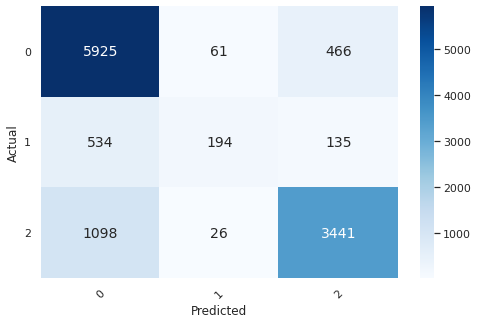

In [ ]:

#score model
rf = RandomForestClassifier(max_depth=40, max_features='log2',
                                        min_samples_leaf=2,
                                        min_samples_split=20,
                                        n_estimators=400,random_state=50)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

minmax scaler improved results 

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'Random Forest' ,
      "Scaler": 'MinMax' , 
       'Encoder' : 'Label Encoder',
               'f1_micro train' : 0.8591510,
                    'f1_micro test' : 0.8047138}, ignore_index=True)

##Standerd Scaler/ Label Encoder

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

scaler = StandardScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', RandomForestClassifier())])

param_grid = {'classiffier__max_depth': [1, 3, 5, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200, 300, 400,600,800,1000, None],
              'classiffier__max_features': ['sqrt','log2', None],
              "classiffier__criterion": ["gini", "entropy"],
              'classiffier__min_samples_leaf': [0.1,0.5,1, 2, 4,6,8,10,20,30,50,70,80,100,200,400,500],
              'classiffier__min_samples_split': [0.1,0.5,1, 2, 4,6,8,10,20,30,50,70,80,100,200,400,500],
              'classiffier__n_estimators': [1,2,4,6,8,10,20 ,30,40, 50, 100, 200, 400, 600, 800, 1000]}

random_search_rf = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_rf.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_rf.best_score_)
print('Parameters:', random_search_rf.best_params_)
print('Best Model:', random_search_rf.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.7832235389749598
Parameters: {'classiffier__n_estimators': 1000, 'classiffier__min_samples_split': 100, 'classiffier__min_samples_leaf': 10, 'classiffier__max_features': None, 'classiffier__max_depth': 800, 'classiffier__criterion': 'gini'}
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                          

Accuracy score train: 0.8047728277110209
Accuracy score test: 0.7845117845117845
--------------------
Balance Accuracy score train: 0.6245451913338348
Balance Accuracy score test: 0.5982439908102825

--------------------
micro avg score train: 0.8047728277110209
micro avg score test: 0.7845117845117845
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      6452
           1       0.72      0.17      0.27       863
           2       0.84      0.71      0.77      4565

    accuracy                           0.78     11880
   macro avg       0.77      0.60      0.62     11880
weighted avg       0.79      0.78      0.77     11880



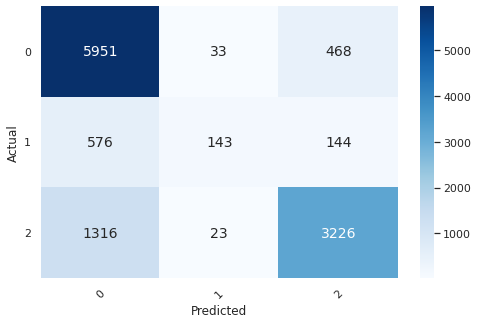

In [ ]:

#score model
rf = RandomForestClassifier(max_depth=800, max_features=None,
                                        min_samples_leaf=10,
                                        min_samples_split=100,
                                        n_estimators=1000)

scaler = StandardScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


no improvements in previous results

In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'Random Forest' ,
      "Scaler": 'StanderdScaler' , 
       'Encoder' : 'Label Encoder',
               'f1_micro train' : 0.804772,
                    'f1_micro test' : 0.784511}, ignore_index=True)

##For random forest min max scaler with label encoder gave best results
## As copaired to xgb and light gbm, Randomforest preformed well on mejority class and poorly on minority class

#Bagging

##Robust Scaler/ Target Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#making pipeline
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
bagg = BaggingClassifier()

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,bagg)

param_grid = { 'baggingclassifier__n_estimators': [100, 200, 300, 400, 500, 700, 800, 900, 1000],
              'baggingclassifier__max_features': [0.2, 0.25, 0.3, 0.35, 0.4]}


random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.8027107087857457
Parameters: {'baggingclassifier__n_estimators': 700, 'baggingclassifier__max_features': 0.4}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                               

Accuracy score train: 0.9652139144342263
Accuracy score test: 0.8069023569023569
--------------------
Balance Accuracy score train: 0.9184267598010009
Balance Accuracy score test: 0.6471462705212008

--------------------
micro avg score train: 0.9652139144342263
micro avg score test: 0.8069023569023569
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6452
           1       0.61      0.27      0.37       863
           2       0.84      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.75      0.65      0.67     11880
weighted avg       0.80      0.81      0.80     11880



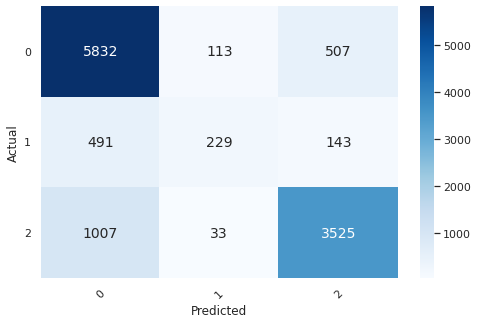

In [ ]:

#score model
bagg = BaggingClassifier(max_features=0.4, n_estimators=700, random_state=42)

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,bagg)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'XGB' ,
      "Scaler": 'StandardScaler' , 
       'Encoder' : 'LabelEncoder',
               'f1_micro train' : 0.9652139,
                    'f1_micro test' : 0.806902}, ignore_index=True)

##MinMax Scaler/ Label Encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#making pipeline
scaler = MinMaxScaler()
encoder = My_LabelEncoder()


# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

#Create a based model
bag  =      BaggingClassifier( random_state=42, )

#fit and predict
# giving all values to pipeline
pipe = make_pipeline(preprocessor,bagg)

param_grid = { 'baggingclassifier__n_estimators': [200, 300, 400, 500, 700, 800, 900],
              'baggingclassifier__max_features': [0.2, 0.3, 0.4]}



random_search_xgb = RandomizedSearchCV(pipe, param_distributions = param_grid, n_jobs = -1, cv = 10,  verbose = 2,  scoring = 'f1_micro')
random_search_xgb.fit(X_train, y_train)

#print best parameters 
print('Best Score:', random_search_xgb.best_score_)
print('Parameters:', random_search_xgb.best_params_)
print('Best Model:', random_search_xgb.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score: 0.8024371309035064
Parameters: {'baggingclassifier__n_estimators': 800, 'baggingclassifier__max_features': 0.4}
Best Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'public_meeting', 'age',
                                                   'permit',
                                                   'amount_tsh_missing',
                                                   'region_code']),
                                                 ('cat',
                                               

Accuracy score train: 0.9656768871398809
Accuracy score test: 0.8063131313131313
--------------------
Balance Accuracy score train: 0.9193601362853396
Balance Accuracy score test: 0.6450903400182798

--------------------
micro avg score train: 0.9656768871398809
micro avg score test: 0.8063131313131313
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6452
           1       0.60      0.26      0.36       863
           2       0.84      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.75      0.65      0.67     11880
weighted avg       0.80      0.81      0.80     11880



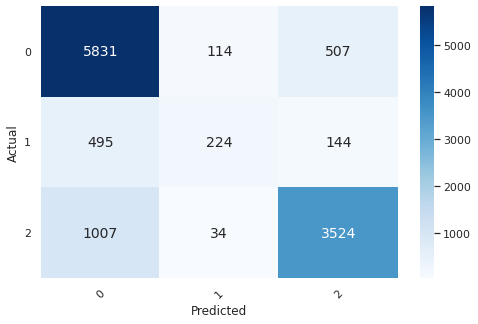

In [ ]:

#score model
BaggingClassifier(max_features=0.4, n_estimators=800,
                                   random_state=42)

scaler = RobustScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,bagg)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'bagging' ,
      "Scaler": 'MinMaxdScaler' , 
       'Encoder' : 'LabelEncoder',
               'f1_micro train' : 0.9656768,
                    'f1_micro test' : 0.806313}, ignore_index=True)

# Stacking 

In [ ]:
rf = RandomForestClassifier(max_depth=40, max_features='log2',
                                        min_samples_leaf=2,
                                        min_samples_split=20,
                                        n_estimators=400,random_state=50)

lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=400,
                                num_leaves=100, random_state=42, reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20)

xgb = XGBClassifier(colsample_bytree=0.4, eta=0.9, gamma = 0.8, learning_rate = 0.2, min_child_weight = 4, reg_lambda = 0.4,
                    max_depth=8, n_estimators= 80, reg_alpha = 0, objective='multi:softprob',random_state=42)



Accuracy score train: 0.8583303520696984
Accuracy score test: 0.8055555555555556
--------------------
Balance Accuracy score train: 0.7167019882937261
Balance Accuracy score test: 0.6461844121698408

--------------------
micro avg score train: 0.8583303520696984
micro avg score test: 0.8055555555555556
              precision    recall  f1-score   support

           0       0.79      0.90      0.85      6452
           1       0.63      0.27      0.37       863
           2       0.84      0.77      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.67     11880
weighted avg       0.80      0.81      0.79     11880



'\nAccuracy score train: 0.9224520718028578\nAccuracy score test: 0.8156565656565656\n--------------------\nBalance Accuracy score train: 0.8220678760344611\nBalance Accuracy score test: 0.6563989995220343\n\n--------------------\nmicro avg score train: 0.9224520718028578\nmicro avg score test: 0.8156565656565656\n\n'

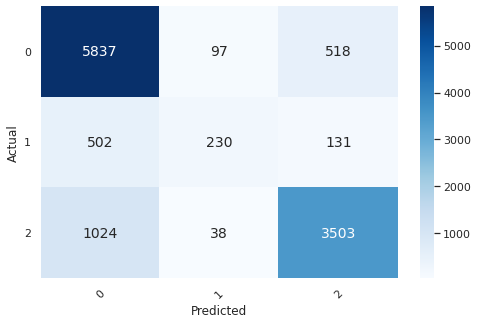

In [ ]:
#machine learning
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier([('rf', rf), 
                              ('xgb', xgb),
                            ('lgbm',lgbm)], final_estimator=LogisticRegression())


scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,stack)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
# balanced_accuracy_score
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


In [ ]:
df_results_all1 = df_results_all1.append({       # first trial is written in results StandardScaler / LabelEncoder
     "Model": 'Stacking' ,
      "Scaler": 'MinMaxScaler' , 
       'Encoder' : 'LabelEncoder',
               'f1_micro train' : 0.858330,
                    'f1_micro test' : 0.805555}, ignore_index=True)

##submission file

In [ ]:
#score model

stack = StackingClassifier([('rf', rf), 
                              ('xgb', xgb),
                            ('lgbm',lgbm)], final_estimator=LogisticRegression())


scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,stack)

pipe.fit(X, y)

# predictions of training set
y_pred = pipe.predict(X)

# predictions of test set
y_pred_test = pipe.predict(f_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y, y_pred)}")


print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y, y_pred)}")


Accuracy:
TRAIN: 0.8613949729793431

Balanced Accuracy:
TRAIN: 0.7200510377829409


In [ ]:
sub = pd.DataFrame(y_pred_test,columns = ['status_group']).reset_index()

sub.drop(columns=['index'],inplace=True)
sub

target_status_group = {0:'functional', 
                       2 : 'non functional', 
                       1 : 'functional needs repair'} 
sub['status_group'] = sub['status_group'].replace(target_status_group)
sub

id  = pd.DataFrame(ids,columns = ['id']).reset_index()
id.drop(columns=['index'],inplace=True)
id

finalsub = pd.concat([id,sub],axis = 1)
finalsub


finalsub.to_csv('/content/Stacking_final.csv',index=False)

dd = pd.read_csv('/content/Stacking_final.csv')
dd

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


# Voting 

In [ ]:
rf = RandomForestClassifier(max_depth=40, max_features='log2',
                                        min_samples_leaf=2,
                                        min_samples_split=20,
                                        n_estimators=400,random_state=50)

lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=400,
                                num_leaves=100, random_state=42, reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20)

xgb = XGBClassifier(colsample_bytree=0.4, eta=0.9, gamma = 0.8, learning_rate = 0.2, min_child_weight = 4, reg_lambda = 0.4,
                    max_depth=8, n_estimators= 80, reg_alpha = 0, objective='multi:softprob',random_state=42)



Accuracy score train: 0.8467139460005472
Accuracy score test: 0.8063131313131313
--------------------
Balance Accuracy score train: 0.6940961533029041
Balance Accuracy score test: 0.6357860728328633

--------------------
micro avg score train: 0.8467139460005472
micro avg score test: 0.8063131313131313
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      6452
           1       0.68      0.23      0.35       863
           2       0.86      0.75      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.78      0.64      0.67     11880
weighted avg       0.81      0.81      0.79     11880



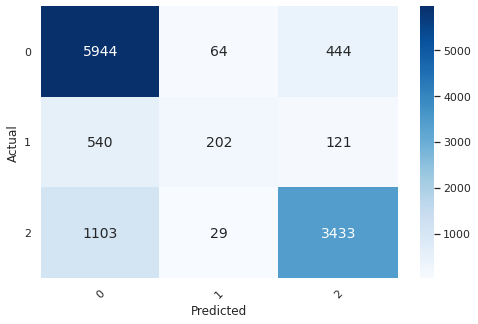

In [ ]:

#score model
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('lgbm', lgbm), ('xgb', xgb), ('rf', rf)], voting = 'soft')
 

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,vc)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


#XGB Voting

In [ ]:
xgb1 = XGBClassifier(colsample_bytree=0.4, eta=0.9, gamma = 0.8, learning_rate = 0.2, min_child_weight = 4, reg_lambda = 0.4,
                    max_depth=8, n_estimators= 80, reg_alpha = 0, objective='multi:softprob',random_state=42)

xgb2 = XGBClassifier(colsample_bytree=0.4, eta=0.9, gamma = 0.8, learning_rate = 0.2, min_child_weight = 4, reg_lambda = 0.4,
                    max_depth=8, n_estimators= 80, reg_alpha = 0, objective='multi:softprob',random_state=32)

xgb3 = XGBClassifier(colsample_bytree=0.4, eta=0.9, gamma = 0.8, learning_rate = 0.2, min_child_weight = 4, reg_lambda = 0.4,
                    max_depth=8, n_estimators= 80, reg_alpha = 0, objective='multi:softprob',random_state=22)

xgb4 = XGBClassifier(colsample_bytree=0.4, eta=0.9, gamma = 0.8, learning_rate = 0.2, min_child_weight = 4, reg_lambda = 0.4,
                    max_depth=8, n_estimators= 80, reg_alpha = 0, objective='multi:softprob',random_state=12)

xgb5 = XGBClassifier(colsample_bytree=0.4, eta=0.9, gamma = 0.8, learning_rate = 0.2, min_child_weight = 4, reg_lambda = 0.4,
                    max_depth=8, n_estimators= 80, reg_alpha = 0, objective='multi:softprob',random_state=2)



Accuracy score train: 0.8405059029019971
Accuracy score test: 0.8027777777777778
--------------------
Balance Accuracy score train: 0.6862883619342658
Balance Accuracy score test: 0.6330467394957652

--------------------
micro avg score train: 0.8405059029019971
micro avg score test: 0.8027777777777778
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      6452
           1       0.69      0.24      0.35       863
           2       0.86      0.74      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.78      0.63      0.66     11880
weighted avg       0.80      0.80      0.79     11880



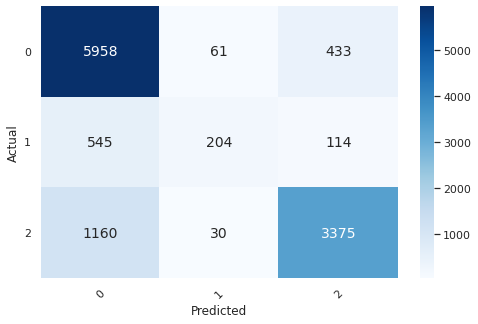

In [ ]:

#score model
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3),('xgb4',xgb4),('xgb5',xgb5)], voting = 'soft')
 

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,vc)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


#Light gbm

In [ ]:
from pandas.core.common import random_state
lgbm1 = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=400,
                                num_leaves=100,  reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20,random_state = 42)

lgbm2 = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=400,
                                num_leaves=100,  reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20,random_state = 68)

lgbm3 = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=400,
                                num_leaves=100, reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20,random_state = 70)

lgbm4 = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=400,
                                num_leaves=100, reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20,random_state = 912)

lgbm5 = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=400,
                                num_leaves=100,  reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20,random_state = 5)



Accuracy score train: 0.8392853384961805
Accuracy score test: 0.805050505050505
--------------------
Balance Accuracy score train: 0.6942186452605726
Balance Accuracy score test: 0.6424360775872787

--------------------
micro avg score train: 0.8392853384961805
micro avg score test: 0.805050505050505
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      6452
           1       0.66      0.26      0.37       863
           2       0.85      0.75      0.80      4565

    accuracy                           0.81     11880
   macro avg       0.77      0.64      0.67     11880
weighted avg       0.80      0.81      0.79     11880



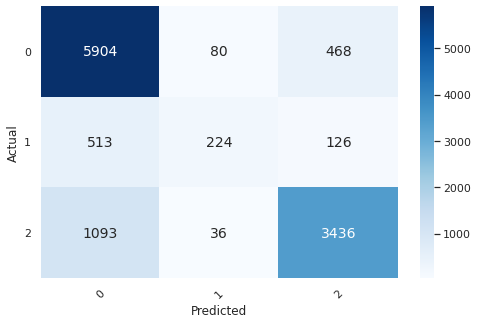

In [ ]:

#score model
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('lgbm1', lgbm1), ('lgbm2', lgbm2), ('lgbm3', lgbm3),('lgbm4',lgbm4),('lgbm5',lgbm5)], voting = 'soft')
 

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,vc)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


this is the best model i will us this model for deployment 

In [ ]:
from joblib import dump, load
dump(pipe, '/content/drive/MyDrive/cs1/LGBM_voting.joblib') 

['/content/drive/MyDrive/cs1/LGBM_voting.joblib']

#Randomforest Voting

In [ ]:
rf1 = RandomForestClassifier(max_depth=40, max_features='log2',
                                        min_samples_leaf=2,
                                        min_samples_split=20,
                                        n_estimators=400,random_state=26)

rf2 = RandomForestClassifier(max_depth=40, max_features='log2',
                                        min_samples_leaf=2,
                                        min_samples_split=20,
                                        n_estimators=400,random_state=78)

rf3 = RandomForestClassifier(max_depth=40, max_features='log2',
                                        min_samples_leaf=2,
                                        min_samples_split=20,
                                        n_estimators=400,random_state=468)

rf4 = RandomForestClassifier(max_depth=40, max_features='log2',
                                        min_samples_leaf=2,
                                        min_samples_split=20,
                                        n_estimators=400,random_state=5)

rf5 = RandomForestClassifier(max_depth=40, max_features='log2',
                                        min_samples_leaf=2,
                                        min_samples_split=20,
                                        n_estimators=400,random_state=29)


Accuracy score train: 0.8590248111281803
Accuracy score test: 0.8043771043771044
--------------------
Balance Accuracy score train: 0.7015442573714371
Balance Accuracy score test: 0.6314014417748236

--------------------
micro avg score train: 0.8590248111281803
micro avg score test: 0.8043771043771044
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      6452
           1       0.69      0.22      0.34       863
           2       0.85      0.75      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.77      0.63      0.66     11880
weighted avg       0.80      0.80      0.79     11880



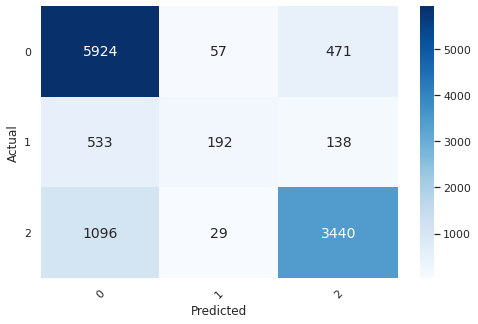

In [ ]:

#score model
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('rf1', rf1), ('rf2', rf2), ('rf3', rf3),('rf4',rf4),('rf5',rf5)], voting = 'soft')
 

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,vc)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

#print best model scores on test data
#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print('-'*20)
print("Balance Accuracy score train: {}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("Balance Accuracy score test: {}".format(balanced_accuracy_score(y_test, y_pred)))
print()
print('-'*20)
print("micro avg score train: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("micro avg score test: {}".format(f1_score(y_test, y_pred,average='micro')))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


#Feature Importance

In [ ]:
# in pipeline features are processed in this order 1'st num_features then cat_features

features = ['gps_height', 'longitude','latitude', 'population', 'public_meeting', 'age', 'permit','amount_tsh_missing','region_code',
            'funder','installer','basin','extraction_type', 'extraction_type_class','payment_type', 'water_quality', 'quantity','source',
            'waterpoint_type','scheme_management','season','region_district','authority_scheme']

In [ ]:
def feature_importance(pipe,name):
  # getting feature importance from pipeline
  # refered from https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline
  
  importances = pipe.steps[1][1].feature_importances_ 

  # Create a pandas dataframe
  df = pd.DataFrame({"Features": features,
                    "Importance": importances})

  plt.figure(figsize=(10,10))
  # make barplot and sort bars
  #https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/
  sns.barplot(y='Features', x="Importance", data=df,
              order=df.sort_values('Importance',ascending = False).Features).set(title=f'Feature Importance {name}')

##Random Forest

In [ ]:

#score model
rf = RandomForestClassifier(max_depth=40, max_features='log2',
                                        min_samples_leaf=2,
                                        min_samples_split=20,
                                        n_estimators=400,random_state=50)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)



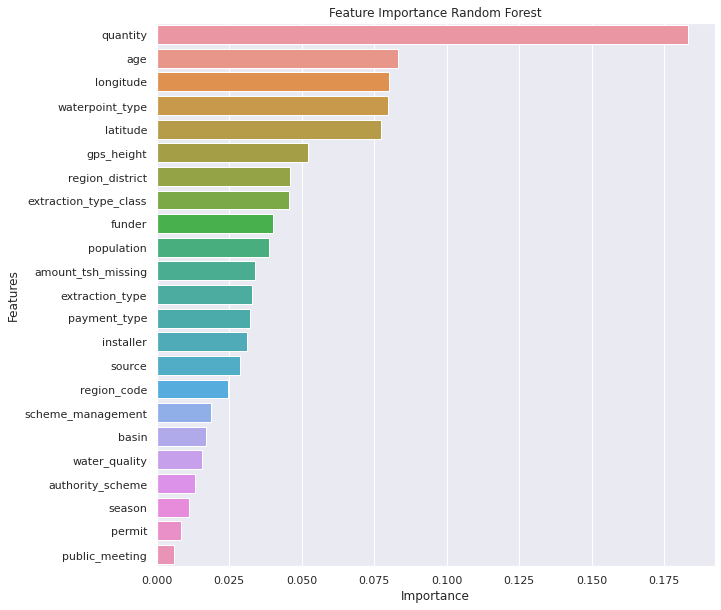

In [ ]:
feature_importance(pipe,'Random Forest')

##XGBOOST

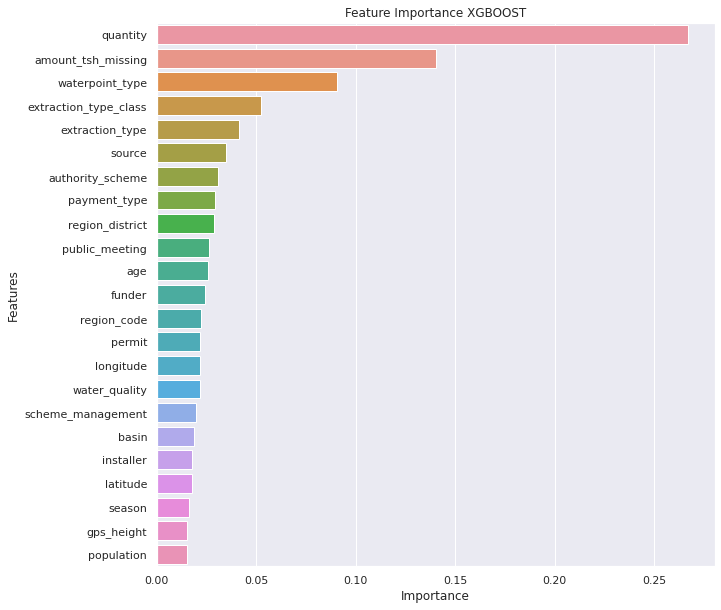

In [ ]:
#score model

xgb = XGBClassifier(colsample_bytree=0.4, eta=0.9, gamma = 0.8, learning_rate = 0.2, min_child_weight = 4, reg_lambda = 0.4,
                    max_depth=8, n_estimators= 80, reg_alpha = 0, objective='multi:softprob',random_state=42)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,xgb)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

feature_importance(pipe,'XGBOOST')

##Light GBM

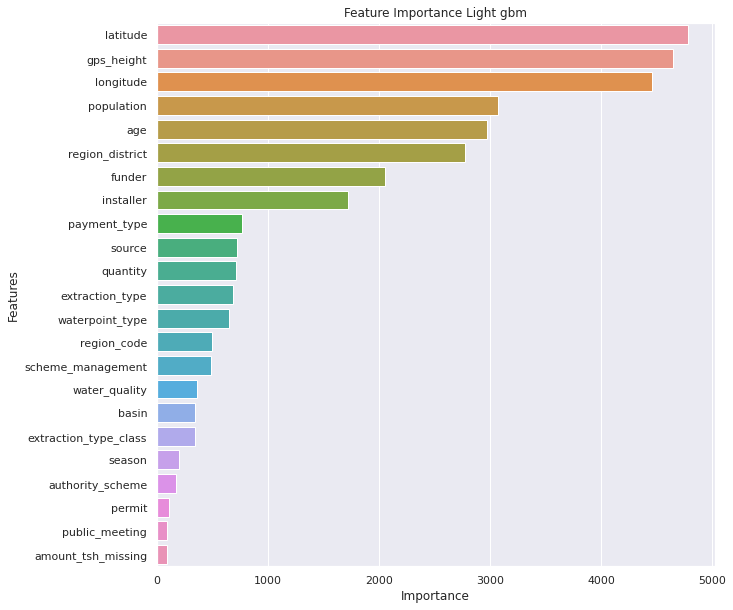

In [ ]:

#score model
lgbm = LGBMClassifier(colsample_bytree=0.8, max_depth=25,
                                min_split_gain=0.3, n_estimators=400,
                                num_leaves=100, random_state=42, reg_alpha=1.3,
                                reg_lambda=1.1, subsample=0.8,
                                subsample_freq=20)

scaler = MinMaxScaler()
encoder = My_LabelEncoder()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline

pipe = make_pipeline(preprocessor,lgbm)

#fit and predict
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

y_pred_train = pipe.predict(X_train)

feature_importance(pipe,'Light gbm')

##Confusion matrix analysis

### Random Forest
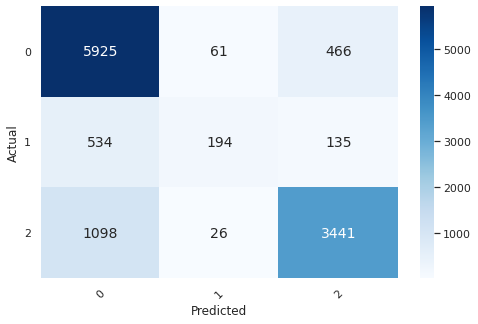
#### Random Forest performs good on mejority class but not well on minority class compaired to other XGB and LGBM

### XGB
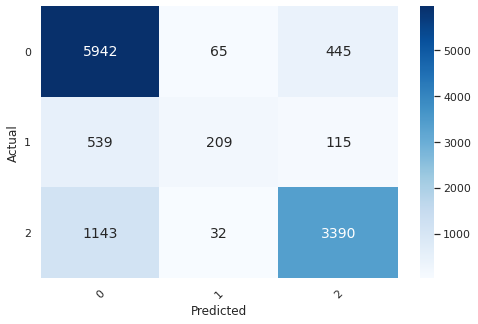
#### XGB performs well on class 0 and 1 but on class 2 RF works well

###LGBM
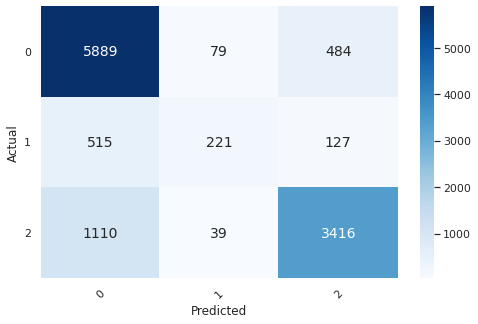
#### LGBM performs works well on class 2 as compaired to Xgb

#Results

In [ ]:
df_results_all1

,Model,Scaler,Encoder,f1_micro train,f1_micro test
0,KNN,Robust,TargetEncoder,0.826322,0.780808
1,KNN,Robust,Label Encoder,0.859677,0.762710
2,KNN,MinMaxScaler,Label Encoder,0.859677,0.762710
3,KNN,StandardScaler,Label Encoder,0.859319,0.762458
4,Decision Tree,RobustScaler,Target encoding,0.779540,0.760690
5,Decision Tree,RobustScaler,Label encoding,0.851091,0.773569
6,Decision Tree,MinMaxScaler,Label encoding,0.774490,0.761363
7,Decision Tree,MinMaxScaler,Label encoding,0.822930,0.776515
8,XGB,RobustScaler,TargetEncoder,0.849340,0.805630
9,XGB,RobustScaler,LabelEncoder,0.790736,0.781734


In [ ]:
#sorted in decreasing order of test score  
df_results_all1.sort_values('f1_micro test',ascending=False)

,Model,Scaler,Encoder,f1_micro train,f1_micro test,Diff
11,XGB,StandardScaler,LabelEncoder,0.897380,0.808750,0.088630
13,LGBM,RobustScaler,LabelEncoder,0.851933,0.807997,0.043936
20,XGB,StandardScaler,LabelEncoder,0.965214,0.806902,0.158312
12,LBGM,RobustScaler,TargetEncoder,0.853111,0.806818,0.046293
21,bagging,MinMaxdScaler,LabelEncoder,0.965677,0.806313,0.159364
8,XGB,RobustScaler,TargetEncoder,0.849340,0.805630,0.043710
22,Stacking,MinMaxScaler,LabelEncoder,0.858330,0.805555,0.052775
15,LGBM,StandardScaler,LabelEncoder,0.840843,0.804966,0.035876
18,Random Forest,MinMax,Label Encoder,0.859151,0.804714,0.054437
10,XGB,MinMaxScaler,LabelEncoder,0.838610,0.803110,0.035500


some top models are overfitting

In [ ]:
# new column added train-test score
df_results_all1['Diff'] = df_results_all1['f1_micro train']-df_results_all1['f1_micro test']

In [ ]:
# Sorted in decreasing order of difference between train and test score
df_results_all1.sort_values('Diff',ascending=True)

,Model,Scaler,Encoder,f1_micro train,f1_micro test,Diff
9,XGB,RobustScaler,LabelEncoder,0.790736,0.781734,0.009002
6,Decision Tree,MinMaxScaler,Label encoding,0.774490,0.761363,0.013127
4,Decision Tree,RobustScaler,Target encoding,0.779540,0.760690,0.018850
19,Random Forest,StanderdScaler,Label Encoder,0.804772,0.784511,0.020261
17,Random Forest,RobustScaler,Label Encoder,0.810707,0.788552,0.022155
16,Random Forest,RobustScaler,TargetEncoder,0.821671,0.795033,0.026638
14,LGBM,MinMaxScaler,LabelEncoder,0.836655,0.801851,0.034804
10,XGB,MinMaxScaler,LabelEncoder,0.838610,0.803110,0.035500
15,LGBM,StandardScaler,LabelEncoder,0.840843,0.804966,0.035876
8,XGB,RobustScaler,TargetEncoder,0.849340,0.805630,0.043710


#Best models

In [ ]:
df_results_all1.iloc[[14,10,18,22]]

,Model,Scaler,Encoder,f1_micro train,f1_micro test,Diff
14,LGBM,MinMaxScaler,LabelEncoder,0.836655,0.801851,0.034804
10,XGB,MinMaxScaler,LabelEncoder,0.838610,0.803110,0.035500
18,Random Forest,MinMax,Label Encoder,0.859151,0.804714,0.054437
22,Stacking,MinMaxScaler,LabelEncoder,0.858330,0.805555,0.052775


#LGBM, Random Forest AND XGB With MinMax Scaler and Label encoder gave us best results which are not overfitting and with good results on test set

In [ ]:
train_val = pd.read_csv('/content/drive/MyDrive/cs1/training_Set_values.csv')
train_labels = pd.read_csv('/content/drive/MyDrive/cs1/training_set_labels.csv')

In [ ]:
train_val.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [ ]:
train= pd.merge(train_labels , train_val, on='id')
train.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
train['status_group'] = train['status_group'].replace(target_status_group)

In [ ]:
train.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,0,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,2,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
X = train.drop(['status_group'], axis=1)
y = train['status_group']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.15, random_state=42 , stratify=y)

In [ ]:
X_test.to_csv('/content/drive/MyDrive/cs1/X_test.csv',index = False)
y_test.to_csv('/content/drive/MyDrive/cs1/y_test.csv',index=False)

In [ ]:
y_test.to_csv('/content/drive/MyDrive/cs1/y_test1.csv',index=False)